# COVID-19 Spanish Legal Word Cloud
---

#### Author: Isidro Brevers Gómez (ibrevers@gmail.com)

Full coding and output: <a href='https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/24553c71-a9d6-4df1-a518-7308cce0ba80/view?access_token=d76aec56a56bc9b132ba53289082a3995e9329136e19e4d89e163ce897d0ac99'>COVID-19 Spanish Legal Word Cloud</a>

Blogpost: [*]

---

## Introduction and Purpose
During the COVID-19 state of alert period, the Spanish Government has passed a number of Royal Decree-Laws implementing measures in different areas.

The main purpose of this project is:
- the analysis of the content of the legal texts passed, generating a COVID-19 shaped word cloud;
- the analysis of the frequency of the words included in the legal texts;
- having fun with Python and Data Science.

## Data description and source
Royal Decree-Laws passed by the Spanish Government during the COVID-19 state of alert period:
- Real Decreto-ley 6-2020, de 10 de marzo
- Real Decreto-ley 7-2020, de 12 de marzo
- Real Decreto-ley 8-2020, de 17 de marzo
- Real Decreto-ley 9-2020, de 27 de marzo
- Real Decreto-ley 10-2020, de 20 de marzo
- Real Decreto-ley 11-2020, de 31 de marzo
- Real Decreto-ley 12-2020, de 31 de marzo
- Real Decreto-ley 13-2020, de 7 de abril
- Real Decreto-ley 14-2020, de 14 de abril
- Real Decreto-ley 15-2020, de 21 de abril
- Real Decreto-ley 16-2020, de 28 de abril
- Real Decreto-ley 17-2020, de 5 de mayo
- Real Decreto-ley 18-2020, de 12 de mayo
- Real Decreto-ley 19-2020, de 26 de mayo

Data has been obtained from the Official Spanish Gazette website (https://www.boe.es/) in pdf format and converted into txt using a free online service.

<a id='ToC'></a>
## Table of contents

<a href='#1'>1. Get data.</a>
    
<a href='#2'>2. Generating a word cloud.</a>

<a href='#3'>3. COVID-shaping the word cloud.</a>

<a href='#4'>4. Word's frequency analysis.</a>

## 0. Install and import libraries

In [1]:
import pandas as pd # Data analysis
import numpy as np # Scientific computing

# wordcloud library https://amueller.github.io/word_cloud/index.html
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# stopwords Spanish dictionary
import nltk
from nltk.corpus import stopwords

from PIL import Image # converting images into arrays

# Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

<a id='1'></a>
## 1. Get data

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# Store the txt files into a variables
RDL_6_2020 = streaming_body_1.read().decode('utf-8')
RDL_7_2020 = streaming_body_2.read().decode('utf-8')
RDL_8_2020_1 = streaming_body_3.read().decode('utf-8')
RDL_8_2020_2 = streaming_body_4.read().decode('utf-8')
RDL_9_2020 = streaming_body_5.read().decode('utf-8')
RDL_10_2020 = streaming_body_6.read().decode('utf-8')
RDL_11_2020_1 = streaming_body_7.read().decode('utf-8')
RDL_11_2020_2 = streaming_body_8.read().decode('utf-8')
RDL_11_2020_3 = streaming_body_9.read().decode('utf-8')
RDL_12_2020 = streaming_body_10.read().decode('utf-8')
RDL_13_2020 = streaming_body_11.read().decode('utf-8')
RDL_14_2020 = streaming_body_12.read().decode('utf-8')
RDL_15_2020_1 = streaming_body_13.read().decode('utf-8')
RDL_15_2020_2 = streaming_body_14.read().decode('utf-8')
RDL_16_2020 = streaming_body_15.read().decode('utf-8')
RDL_17_2020 = streaming_body_16.read().decode('utf-8')
RDL_18_2020 = streaming_body_17.read().decode('utf-8')
RDL_19_2020 = streaming_body_18.read().decode('utf-8')

In [4]:
COVID_legal_texts = RDL_6_2020+RDL_7_2020+RDL_8_2020_1+RDL_8_2020_2+RDL_9_2020+RDL_10_2020+RDL_11_2020_1+RDL_11_2020_2+RDL_11_2020_3+RDL_12_2020+RDL_13_2020+RDL_14_2020+RDL_15_2020_1+RDL_15_2020_2+RDL_16_2020+RDL_17_2020+RDL_18_2020+RDL_19_2020

In [5]:
#print(COVID_legal_texts)

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='2'></a>
## 2. Generating a word cloud

In [6]:
# Download list of Spanish common useless words for the purposes of the word cloud
nltk.download('stopwords')

# Set the list
stop_words_sp = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Add extra words that need to be excluded from the word cloud after a manual iterative review of the results
# To be improved: create a list and append to stop_words_sp
stop_words_sp.add('así')
stop_words_sp.add('Pág')
stop_words_sp.add('Pág.')
stop_words_sp.add('www')
stop_words_sp.add('https')
stop_words_sp.add('Verificable')
stop_words_sp.add('cve')
stop_words_sp.add('cve:')
stop_words_sp.add('BOE')
stop_words_sp.add('artículo')
stop_words_sp.add('artículos')
stop_words_sp.add('boletín')
stop_words_sp.add('núm')
stop_words_sp.add('Núm.')
stop_words_sp.add('dicho')
stop_words_sp.add('entrada')
stop_words_sp.add('vigor')
stop_words_sp.add('oficial')
stop_words_sp.add('real')
stop_words_sp.add('Decreto')
stop_words_sp.add('decreto')
stop_words_sp.add('Decreto-ley')
stop_words_sp.add('decreto-ley')
stop_words_sp.add('ley')
stop_words_sp.add('Ley')
stop_words_sp.add('En')
stop_words_sp.add('enero')
stop_words_sp.add('febrero')
stop_words_sp.add('marzo')
stop_words_sp.add('marzo,')
stop_words_sp.add('abril')
stop_words_sp.add('mayo')
stop_words_sp.add('junio')
stop_words_sp.add('julio')
stop_words_sp.add('agosto')
stop_words_sp.add('septiembre')
stop_words_sp.add('octubre')
stop_words_sp.add('noviembre')
stop_words_sp.add('noviembre,')
stop_words_sp.add('diciembre')
stop_words_sp.add('lunes')
stop_words_sp.add('Lunes')
stop_words_sp.add('martes')
stop_words_sp.add('Martes')
stop_words_sp.add('miércoles')
stop_words_sp.add('Miércoles')
stop_words_sp.add('jueves')
stop_words_sp.add('Jueves')
stop_words_sp.add('viernes')
stop_words_sp.add('Viernes')
stop_words_sp.add('sábado')
stop_words_sp.add('Sábado')
stop_words_sp.add('domingo')
stop_words_sp.add('Domingo')
stop_words_sp.add('día')
stop_words_sp.add('días')
stop_words_sp.add('mes')
stop_words_sp.add('meses')
stop_words_sp.add('año')
stop_words_sp.add('años')
stop_words_sp.add('fecha')
stop_words_sp.add('ello')
stop_words_sp.add('Se')
stop_words_sp.add('se')
stop_words_sp.add('Sec.')
stop_words_sp.add('Sec')
stop_words_sp.add('parte')
stop_words_sp.add('y')
stop_words_sp.add('2020')
stop_words_sp.add('estado')
stop_words_sp.add('Estado')
stop_words_sp.add('ESTADO')
stop_words_sp.add('Real')
stop_words_sp.add('del')
stop_words_sp.add('Del')
stop_words_sp.add('DEL')
stop_words_sp.add('El')
stop_words_sp.add('La')
stop_words_sp.add('la')
stop_words_sp.add('Las')
stop_words_sp.add('las')
stop_words_sp.add('0,00')
stop_words_sp.add('1')
stop_words_sp.add('1.')
stop_words_sp.add('2.')
stop_words_sp.add('11')
stop_words_sp.add('13')
stop_words_sp.add('14')
stop_words_sp.add('17')
stop_words_sp.add('18')
stop_words_sp.add('65')
stop_words_sp.add('https://www.boe.es')
stop_words_sp.add('BOLETÍN')
stop_words_sp.add('I.')
stop_words_sp.add('BOE')
stop_words_sp.add('BOE-A-2020-3580')
stop_words_sp.add('OFICIAL')
stop_words_sp.add('Artículo')
stop_words_sp.add('General')
stop_words_sp.add('Comunidades')
stop_words_sp.add('Por')
stop_words_sp.add('FJ')
stop_words_sp.add('apartado')
stop_words_sp.add('adicional')
stop_words_sp.add('hacer')
stop_words_sp.add('aplicación')
stop_words_sp.add('Seguridad')
stop_words_sp.add('Social')
stop_words_sp.add('caso')
stop_words_sp.add('régimen')
stop_words_sp.add('podrá')
stop_words_sp.add('mediante')
stop_words_sp.add('Disposición')
stop_words_sp.add('disposición')
stop_words_sp.add('carácter')
stop_words_sp.add('caso,')
stop_words_sp.add('que,')

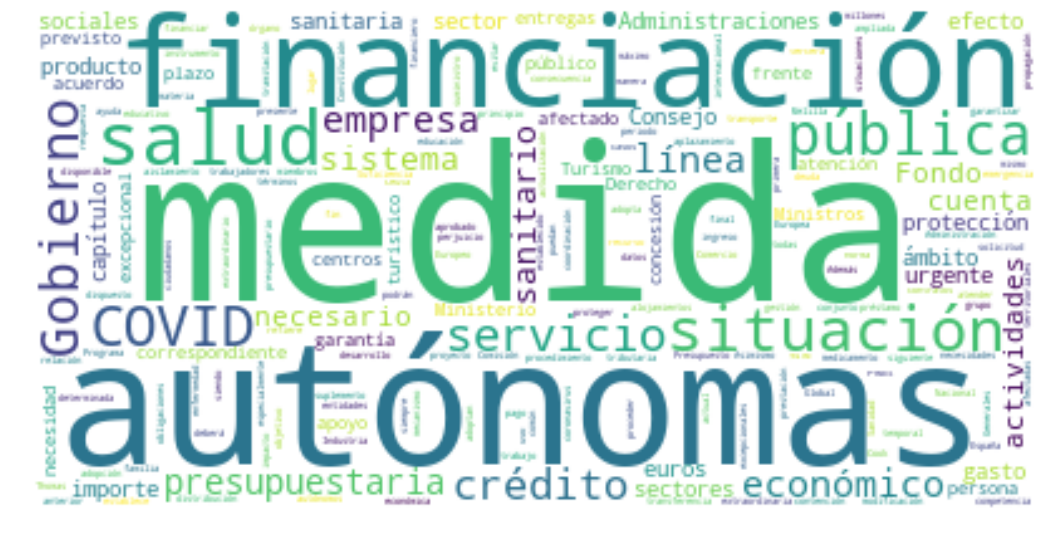

In [8]:
# Instantiate a word cloud object
COVID_legal_texts_wc = WordCloud(
    background_color='white',
    max_words=500, # max number of words
    stopwords=stop_words_sp, # excluded words dictionary
    colormap='viridis', # default
    collocations=False # whether to include collocations (bigrams) of two words
)

# Generate the word cloud
COVID_legal_texts_wc.generate(COVID_legal_texts)
# Re-generate the word cloud
COVID_legal_texts_wc.generate(RDL_7_2020)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(24)

plt.imshow(COVID_legal_texts_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='3'></a>
## 3. COVID-shaping the word cloud

In [9]:
# Download image
!wget --quiet https://i2.pngguru.com/preview/166/156/888/green-symbol-circle-covid19-coronavirus-watercolor-paint-wet-ink-png-clipart.jpg
    
# Save mask
covid_mask = np.array(Image.open('green-symbol-circle-covid19-coronavirus-watercolor-paint-wet-ink-png-clipart.jpg'))

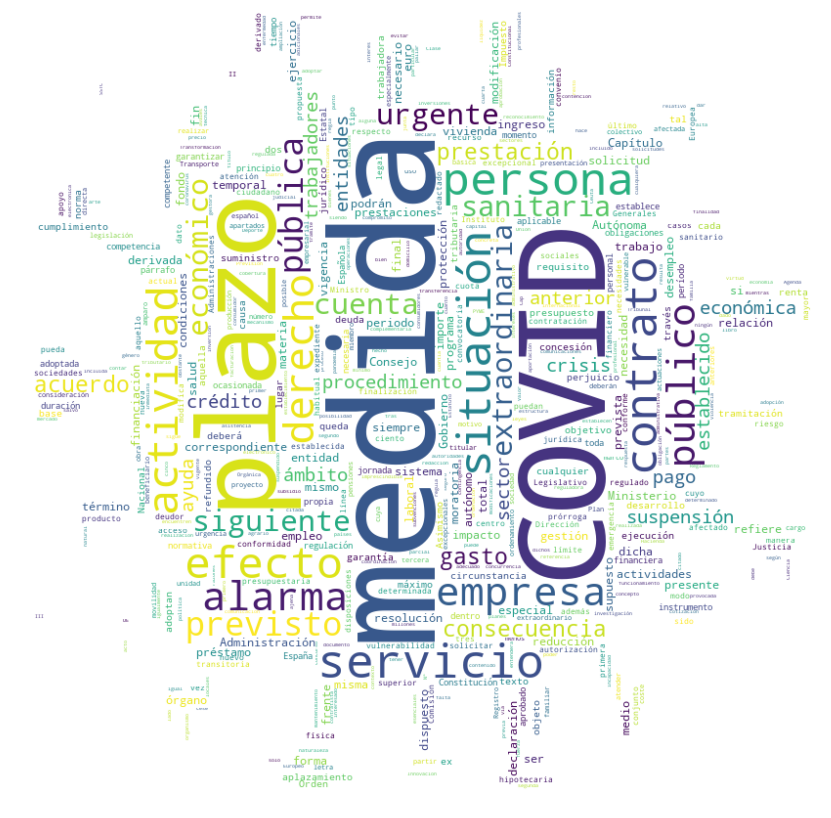

In [10]:
# Instantiate a new word cloud object
COVID_legal_texts_wc = WordCloud(
    background_color='white',
    colormap='viridis', # default
    max_words=500, # max number of words
    mask=covid_mask, # mask
    stopwords=stop_words_sp, # excluded words dictionary
    collocations=False, # whether to include collocations (bigrams) of two words
    prefer_horizontal=0.6 # the ratio of times to try horizontal fitting as opposed to vertical
)

# Generate the word cloud
COVID_legal_texts_wc.generate(COVID_legal_texts)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(COVID_legal_texts_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='4'></a>
## 4. Word's frequency analysis

In [11]:
# Need to split first COVID_legal_texts due to the size
# To be improved: split function seems not to work properly with big size vars
COVID_legal_texts_1 = RDL_6_2020 + RDL_7_2020 + RDL_8_2020_1 + RDL_8_2020_2
COVID_legal_texts_2 = RDL_9_2020 + RDL_10_2020 + RDL_11_2020_1 + RDL_11_2020_2
COVID_legal_texts_3 = RDL_11_2020_3 + RDL_12_2020 + RDL_13_2020 + RDL_14_2020
COVID_legal_texts_4 = RDL_15_2020_1 + RDL_15_2020_2 + RDL_16_2020 + RDL_17_2020
COVID_legal_texts_5 = RDL_18_2020 + RDL_19_2020

In [12]:
# Split the string into a list 1
wordlist1 = COVID_legal_texts_1.split()

# Calculate the frequency of each word
wordfreq1 = []
for w in wordlist1:
    wordfreq1.append(wordlist1.count(w))

In [13]:
# Split the string into a list 2
wordlist2 = COVID_legal_texts_2.split()

# Calculate the frequency of each word
wordfreq2 = []
for w in wordlist2:
    wordfreq2.append(wordlist2.count(w))

In [14]:
# Split the string into a list 3
wordlist3 = COVID_legal_texts_3.split()

# Calculate the frequency of each word
wordfreq3 = []
for w in wordlist3:
    wordfreq3.append(wordlist3.count(w))

In [15]:
# Split the string into a list 4
wordlist4 = COVID_legal_texts_4.split()

# Calculate the frequency of each word
wordfreq4 = []
for w in wordlist4:
    wordfreq4.append(wordlist4.count(w))

In [16]:
# Split the string into a list 5
wordlist5 = COVID_legal_texts_5.split()

# Calculate the frequency of each word
wordfreq5 = []
for w in wordlist5:
    wordfreq5.append(wordlist5.count(w))

In [17]:
# Create a dataframe with the frequency for each word and eliminate duplicates
wordcount = {'Word':wordlist1+wordlist2+wordlist3+wordlist4+wordlist5, 'Freq':wordfreq1+wordfreq2+wordfreq3+wordfreq4+wordfreq5}
df_wordcount = pd.DataFrame(wordcount)
df_wordcount = df_wordcount.drop_duplicates()

In [18]:
# Sort by frequency
df_wordcount.sort_values('Freq', ascending=False, inplace=True)
df_wordcount = df_wordcount.reset_index(drop=True)

In [19]:
# Create a dataframe with the Spanish stop words
df_stopwordssp = pd.DataFrame(stop_words_sp)
df_stopwordssp.columns = ['Word']

In [20]:
# (Creative) left join if null 
df_filtwordcount = pd.merge(df_wordcount, df_stopwordssp, on=['Word'], how = 'outer', indicator='True')
df_filtwordcount = df_filtwordcount[df_filtwordcount['True'] == 'left_only']
df_filtwordcount = df_filtwordcount.drop(['True'], axis=1).reset_index(drop=True)

In [21]:
# Group by 'Word' and reset index so 'Word' becomes a column again
df_filtwordcount = df_filtwordcount.groupby(['Word']).sum().sort_values('Freq', ascending=False)
df_filtwordcount.reset_index(inplace=True)

In [22]:
# Filter the first 20 values and change 'freq' type to integer
df_filtwordcount = df_filtwordcount.head(20)
df_filtwordcount['Freq'] = df_filtwordcount['Freq'].astype(int)

In [23]:
df_filtwordcount

,Word,Freq
0,medidas,790
1,situación,482
2,actividad,354
3,servicios,322
4,personas,307
5,efectos,297
6,plazo,274
7,social,267
8,crisis,264
9,entidades,248


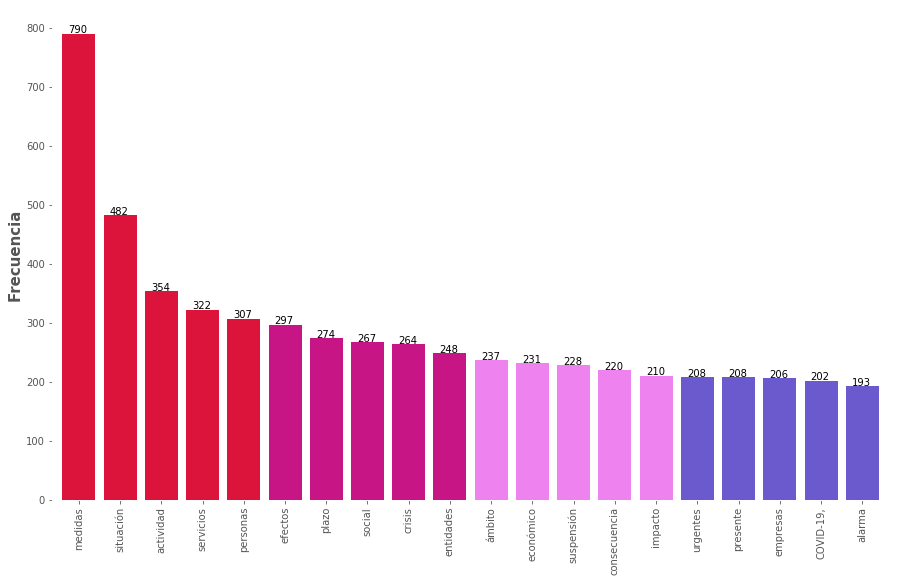

In [24]:
# Bar chart
df_barchart = df_filtwordcount.set_index(['Word'])

# Color array for the heat
c = [('crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'violet', 'violet', 'violet',
      'violet', 'violet', 'slateblue', 'slateblue', 'slateblue', 'slateblue', 'slateblue')]

# Add markers to bar chart
ax = df_barchart.plot(kind='bar', figsize=(15, 9), width=0.8, color=c)

xs = df_filtwordcount['Word']
ys = df_filtwordcount['Freq']

plt.xlabel('', fontweight='bold', fontsize=12)
plt.ylabel('Frecuencia', fontweight='bold', fontsize=15)
#plt.title('Frequencia de las palabras', fontweight='bold', fontsize=14)

ax.set_facecolor('none')
ax.legend().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index,data in enumerate(ys):
    plt.text(x=index-0.25 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

# Display chart
plt.show()

<a href='#ToC'>[Back to Table of Contents]</a>